In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import argparse  
from pandas.io import gbq

In [188]:
data = pd.read_csv('/home/anastacia/python_netology/peremeny1.csv')
data.head()

,Дата_время,Дата,месяц_год,ФИО,участвовал с ДСГ,Возраст_до исп,Возраст,Место учебы/работы,"Как узнали о ""Перспективах""",ДСГ,ВВД,ВНМ,авто,Я хочу помочь,Комментарий,Куда был направлен волонтёр,Unnamed: 16
0,07.01.2019 1:22,07.01.2019,1.2019,Мария Черкасова,0,20 лет,20,НИУ ВШЭ СПб,Поиск в интернете,0,1,0,0,NaN,не берёт трубку. уже в другой программе. готов...,NaN,NaN
1,09.01.2019 13:57,09.01.2019,1.2019,Людмила Романова,0,33,33,безработная,Поиск в интернете,0,1,0,1,прямая помощь,собеседование 15.01. передала координаты Оксан...,СВ,NaN
2,09.01.2019 17:32,09.01.2019,1.2019,Дудукина Кристина,0,30,30,Производственная компания Алори,Стикер или звуковая реклама в метро,0,1,1,0,"Дизайном, Фотосъёмкой, Версткой и предпечатной...",собеседование 15.01. не пришла,NaN,NaN
3,11.01.2019 0:31,11.01.2019,1.2019,Александр Елистратов,0,14,14,"МБОУ ""СОШ Кудровский ЦО №1""",Социальные сети,0,1,0,0,NaN,NaN,NaN,NaN
4,12.01.2019 2:15,12.01.2019,1.2019,Татьяна Митькина,0,18,18,"СПбГИКиТ - учеба, 1 курс",Поиск в интернете,0,1,1,0,"Фотосъёмкой, Видеосъёмкой, Я пока что мало зна...",приглашена на собеседование 21.01. передала ко...,ВД Павловск,NaN


In [259]:
df = pd.read_csv('/home/anastacia/python_netology/uch.csv')
df.head()

,date,month,name,uchastie_dsg,old,sex,job,how_know,DSG,VVD,VNM,auto,help,comment,result
0,06.08.2018,8.2018,Харитонов Владислав,1,16.0,м,не учусь,Стикер или звуковая реклама в метро,1,1,0,0,0,NaN,"хочет на ДСГ, придет на собеседование"
1,20.08.2018,8.2018,Ткаченко Валерия,1,25.0,ж,"Университет Репина заочного отделения, специал...",Социальные сети,1,0,1,0,0,"Дизайном, Фотосъёмкой, Версткой и предпечатной...","была на собеседовании 23 августа, поедет на пр..."
2,02.12.2016,12.2016,Татьяна Костева,1,25.0,ж,"ООО ""Промпроект""",Стикер в вагонах метро,1,0,0,0,0,Фотосъемкой,собеседование с Аней 06.12 в 16.45
3,10.01.2018,1.2018,Стрекалова Екатерина,1,27.0,ж,храм Благовещения Пресвятой Богородицы,Социальные сети,1,0,0,0,0,NaN,была на собеседовании 12.01. Поедет в Павловск...
4,07.02.2019,2.2019,Соколовская Лидия,1,37.0,ж,Городская клиническая больница (медсестра),Социальные сети,1,0,0,0,NaN,общались по телефону. хочет переехать в спб. в...,возможно ДСГ 19-20


In [262]:
w = df.groupby(['sex'],sort=True).size().sort_values()
w

sex
м     7
ж    34
dtype: int64

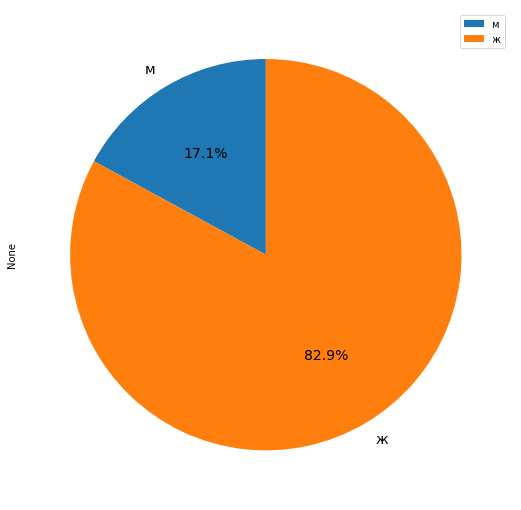

In [264]:
w.plot(kind='pie', autopct='%1.1f%%', 
                                 startangle=90, shadow=False, legend = True, fontsize=14)

In [297]:
f = df[df['sex'] == 'м'].sort_values('old', ascending=False)
f = f[['old', 'sex']]
f.style.bar()

,old,sex
10,32,м
20,31,м
21,20,м
30,20,м
36,20,м
23,17,м
0,16,м


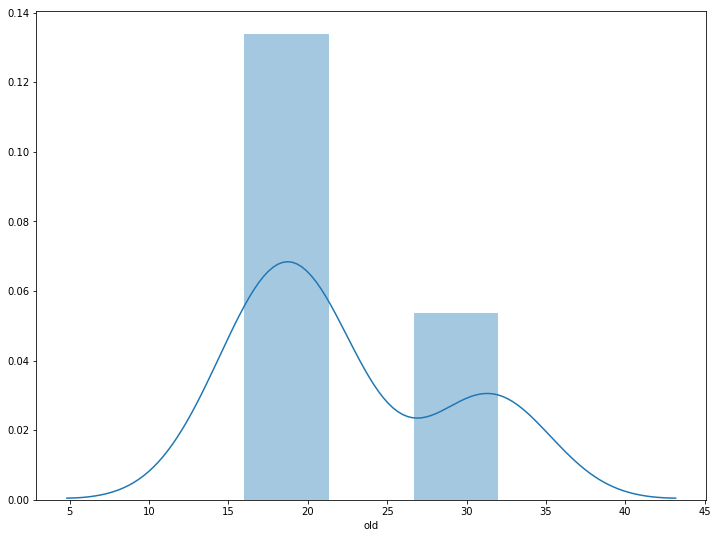

In [298]:
sns.distplot(f['old'])

In [299]:
y = df[df['sex'] == 'ж'].sort_values('old', ascending=False)
y = y[['old', 'sex']]

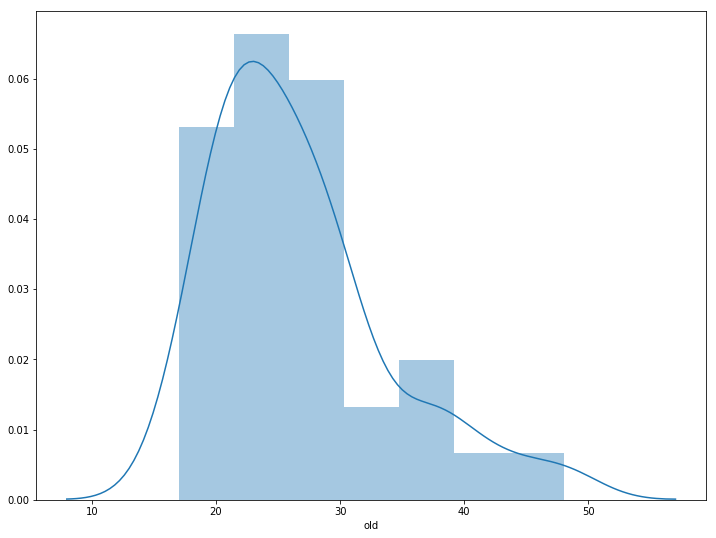

In [300]:
sns.distplot(y['old'])

In [189]:
data = data.rename({'Дата':'date', 'месяц_год':'month', 'ФИО':'name', 'участвовал с ДСГ':'uchastie_dsg', 'Возраст':'old', 'Место учебы/работы':'job', 'Как узнали о "Перспективах"':'how_know', 'ДСГ':'DSG', 'ВВД':'VVD', 'ВНМ':'VNM', 'авто':'auto', 'Я хочу помочь':'help', 'Комментарий':'comment', 'Куда был направлен волонтёр':'result'}, axis='columns', inplace=False)

In [190]:
data = data[['date', 'month', 'name', 'uchastie_dsg', 'old', 'job', 'how_know', 'DSG', 'VVD', 'VNM', 'auto', 'help', 'comment', 'result']]
data.head()

,date,month,name,uchastie_dsg,old,job,how_know,DSG,VVD,VNM,auto,help,comment,result
0,07.01.2019,1.2019,Мария Черкасова,0,20,НИУ ВШЭ СПб,Поиск в интернете,0,1,0,0,NaN,не берёт трубку. уже в другой программе. готов...,NaN
1,09.01.2019,1.2019,Людмила Романова,0,33,безработная,Поиск в интернете,0,1,0,1,прямая помощь,собеседование 15.01. передала координаты Оксан...,СВ
2,09.01.2019,1.2019,Дудукина Кристина,0,30,Производственная компания Алори,Стикер или звуковая реклама в метро,0,1,1,0,"Дизайном, Фотосъёмкой, Версткой и предпечатной...",собеседование 15.01. не пришла,NaN
3,11.01.2019,1.2019,Александр Елистратов,0,14,"МБОУ ""СОШ Кудровский ЦО №1""",Социальные сети,0,1,0,0,NaN,NaN,NaN
4,12.01.2019,1.2019,Татьяна Митькина,0,18,"СПбГИКиТ - учеба, 1 курс",Поиск в интернете,0,1,1,0,"Фотосъёмкой, Видеосъёмкой, Я пока что мало зна...",приглашена на собеседование 21.01. передала ко...,ВД Павловск


In [191]:
data_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 14 columns):
date            854 non-null object
month           854 non-null float64
name            862 non-null object
uchastie_dsg    862 non-null int64
old             861 non-null object
job             849 non-null object
how_know        862 non-null object
DSG             862 non-null int64
VVD             862 non-null int64
VNM             862 non-null int64
auto            862 non-null int64
help            532 non-null object
comment         666 non-null object
result          246 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 94.4+ KB


In [192]:
data_uchastie = data[data['uchastie_dsg'] != 0].sort_values('name', ascending=False)
data_uchastie.count()

date            40
month           40
name            41
uchastie_dsg    41
old             41
job             41
how_know        41
DSG             41
VVD             41
VNM             41
auto            41
help            34
comment         19
result          39
dtype: int64

In [ ]:
data_uchastie 

In [193]:
data_uchastie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 858 to 861
Data columns (total 14 columns):
date            40 non-null object
month           40 non-null float64
name            41 non-null object
uchastie_dsg    41 non-null int64
old             41 non-null object
job             41 non-null object
how_know        41 non-null object
DSG             41 non-null int64
VVD             41 non-null int64
VNM             41 non-null int64
auto            41 non-null int64
help            34 non-null object
comment         19 non-null object
result          39 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 4.8+ KB


In [194]:
data_uchastie['old'] = data_uchastie['old'].astype(float)

In [195]:
data_uchastie.mean()

month            6.551762
uchastie_dsg     1.000000
old             25.926829
DSG              0.878049
VVD              0.219512
VNM              0.195122
auto             0.024390
dtype: float64

In [256]:
f = data_uchastie.groupby(['old'],sort=True).size().sort_values()
f

old
16.0    1
39.0    1
28.0    1
43.0    1
24.0    1
23.0    1
48.0    1
19.0    1
18.0    1
21.0    2
27.0    2
29.0    2
30.0    2
31.0    2
32.0    2
37.0    2
17.0    2
26.0    2
25.0    3
22.0    5
20.0    6
dtype: int64

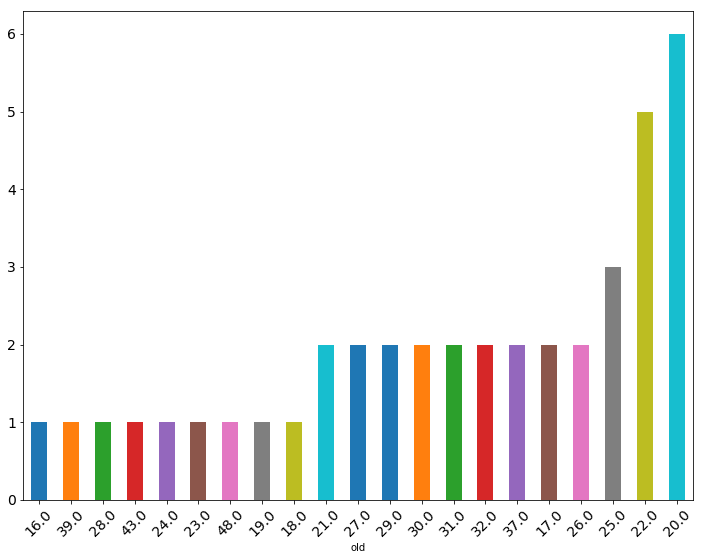

In [257]:
f.plot(kind='bar', rot=45, fontsize=14, stacked=False)

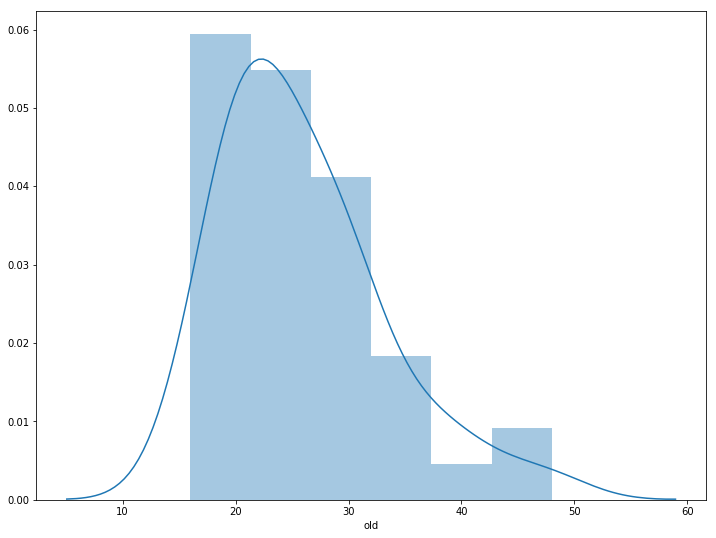

In [301]:
#распределение по возрасту
sns.distplot(data_uchastie['old'])

In [197]:
data_uchastie.groupby(['how_know'],sort=True).size()

how_know
https://kudago.com/spb/list/volontyorskie-organizatsii/                                                                                                                                                      1
Знакомые                                                                                                                                                                                                     1
Об организации узнала в университете. Учусь в институте дефектологического образования и реабилитации. На 1 курсе к нам приходил представитель вашей организации и подробным образом рассказал обо всем.     1
Объявление на остановке                                                                                                                                                                                      1
От друзей                                                                                                                                                          

In [198]:
data_uchastie.groupby(['comment'],sort=True).size()

comment
Дизайном, Версткой и предпечатной подготовкой, В программе Перспективы меня заинтересовала программа "добровольного социального года", если конкретно, то работа в "семейной поддержке", в "центре дневной трудовой занятости для молодых людей с множественными нарушениями развития".    1
Дизайном, Фотосъемкой                                                                                                                                                                                                                                                                      1
Дизайном, Фотосъемкой, Версткой и предпечатной подготовкой                                                                                                                                                                                                                                 1
Дизайном, Фотосъемкой, Печатью постеров и стикеров                                                                                       

In [258]:
data_uchastie.to_csv(r'/home/anastacia/python_netology/uch.csv', index = False, header=True)

In [199]:
data_dsg = data[data['DSG'] != 0].sort_values('name', ascending=False)
data_dsg = data_dsg[data_dsg['uchastie_dsg'] != 1].sort_values('name', ascending=False)
data_dsg['old'] = data_dsg['old'].astype(float)
data_dsg = data_dsg[data_dsg['old'] >= 16].sort_values('name', ascending=False)
data_dsg

,date,month,name,uchastie_dsg,old,job,how_know,DSG,VVD,VNM,auto,help,comment,result
218,14.06.2019,6.2019,хохлова юлия,0,35.0,опс 196602,реклама в метро,1,0,0,0,любая помощь,3 июля уезжает в отпуск.приглашена на встречу ...,ШКОЛА август
815,03.06.2020,6.2020,коровин игорь,0,26.0,работаю удаленно,Социальные сети,1,0,0,0,NaN,9.06. в 11:00 созвон-собеседование. после собе...,NaN
268,15.07.2019,7.2019,Яровой Алексей,0,40.0,Не работаю,Стикер или звуковая реклама в метро,1,0,0,0,Дизайном,NaN,NaN
267,15.07.2019,7.2019,Яровой Алексей,0,40.0,Не работаю,Стикер или звуковая реклама в метро,1,0,0,0,Дизайном,зарегистрировался на timepad,NaN
263,15.07.2019,7.2019,Янович Надя,0,30.0,отсутствует,заявка на гудсерфинге,1,0,0,0,досугом,зарегистрировалась на timepad,NaN
455,03.11.2019,11.2019,Юмалова Елизавета,0,18.0,СПбГУП(заочка),Стикер или звуковая реклама в метро,1,0,0,0,NaN,приглашена на встречу 12.11,NaN
764,13.04.2020,4.2020,Щеглова Елена Андреевна,0,35.0,Салон Красоты,Поиск в интернете,1,1,1,1,"Дизайном, Фотосъёмкой","оказывается Марьино не в СПб, а в Мск.",NaN
168,30.04.2019,4.2019,Щавинская Ася,0,24.0,Сзгму им. И. И. Мечникова,Поиск в интернете,1,1,1,0,"Переводом, Версткой и предпечатной подготовкой","звонила в офис, я сказала ей про встречу в офи...",ВД Павловск вскр.
131,26.03.2019,3.2019,Шпак Инга,0,54.0,не работаю,Социальные сети,1,0,0,0,"Версткой и предпечатной подготовкой, физическа...",ВД. собеседование 2.04,ВД Павловск
266,15.07.2019,7.2019,Шалунова Дарья,0,21.0,КемГУ,сми,1,0,0,0,NaN,"поступает. если не поступит, то будет с нами с...",NaN


In [200]:
data_dsg.to_csv(r'/home/anastacia/python_netology/per.csv', index = False, header=True)


In [201]:
data_dsg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 218 to 342
Data columns (total 14 columns):
date            137 non-null object
month           137 non-null float64
name            138 non-null object
uchastie_dsg    138 non-null int64
old             138 non-null float64
job             138 non-null object
how_know        138 non-null object
DSG             138 non-null int64
VVD             138 non-null int64
VNM             138 non-null int64
auto            138 non-null int64
help            92 non-null object
comment         119 non-null object
result          30 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 16.2+ KB


In [202]:
data['month'] = data['month'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 14 columns):
date            854 non-null object
month           854 non-null object
name            862 non-null object
uchastie_dsg    862 non-null int64
old             861 non-null object
job             849 non-null object
how_know        862 non-null object
DSG             862 non-null int64
VVD             862 non-null int64
VNM             862 non-null int64
auto            862 non-null int64
help            532 non-null object
comment         666 non-null object
result          246 non-null object
dtypes: int64(5), object(9)
memory usage: 94.4+ KB


In [203]:
data_year = data[data['month'] == 7.2019].sort_values('date', ascending = False)
data_year.count()

date            50
month           50
name            50
uchastie_dsg    50
old             49
job             50
how_know        50
DSG             50
VVD             50
VNM             50
auto            50
help            34
comment         43
result          14
dtype: int64

In [204]:
data_query1 = data[(data['month'] == 7.2019) | (data['month'] == 8.2019) | (data['month'] == 9.2019) | (data['month'] == 10.2019) | (data['month'] == 10.2019) | (data['month'] == 11.2019) | (data['month'] == 12.2019) | (data['month'] == 1.202) | (data['month'] == 2.202) | (data['month'] == 3.202) | (data['month'] == 4.202) | (data['month'] == 5.202) | (data['month'] == 6.202)]

In [205]:
data_query1['name'].unique

<bound method Series.unique of 242                 Анна алифиренко
243                 Хюнер Елизавета
244                  Загитова Алина
245               Ковалева Виктория
246               Карпова Елизавета
247                      Джон Козин
248                 Ксения Боженова
249                Татьяна Манькова
250                   Ходакова Даша
251    фомченков денис владимирович
252               Милослава Внукова
253                     Анна Кацман
254                   Ирина Петрова
255                    Пацкова Юлия
256         Войнова Анна Викторовна
257                  Чернобай Артем
258                    Яна тарарина
259             Михаил Голодяевский
260                  Кайырова Алима
261                Munira Sharipova
262                      Илья Репин
263                     Янович Надя
264                 Елена Баруткина
265                   Софья Бохонко
266                  Шалунова Дарья
267                  Яровой Алексей
268                  Яровой Алекс

In [206]:
data_query1['old'] = data_query1['old'].astype(float)
data_query = data_query1[data_query1['old'] > 15].sort_values('date', ascending = False)

/home/anastacia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [207]:
data_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 451 to 610
Data columns (total 14 columns):
date            524 non-null object
month           524 non-null object
name            524 non-null object
uchastie_dsg    524 non-null int64
old             524 non-null float64
job             514 non-null object
how_know        524 non-null object
DSG             524 non-null int64
VVD             524 non-null int64
VNM             524 non-null int64
auto            524 non-null int64
help            308 non-null object
comment         444 non-null object
result          121 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 61.4+ KB


In [208]:
data_query['month'] = data_query['month'].map({7.2019: 'июль 2019', 8.2019: 'август 2019', 9.2019: 'сентябрь 2019', 10.2019: 'октябрь 2019', 11.2019: 'ноябрь 2019', 12.2019: 'декабрь 2019', 1.202: 'январь 2020', 2.202: 'февраль 2020', 3.202: 'март 2020', 4.202: 'апрель 2020', 5.202: 'май 2020', 6.202: 'июнь 2020'}) 

In [209]:
data_query.groupby(['month'],sort=True).size().sort_values()

month
июнь 2020        15
май 2020         24
апрель 2020      32
сентябрь 2019    39
март 2020        44
ноябрь 2019      45
июль 2019        49
февраль 2020     49
январь 2020      50
август 2019      54
октябрь 2019     57
декабрь 2019     66
dtype: int64

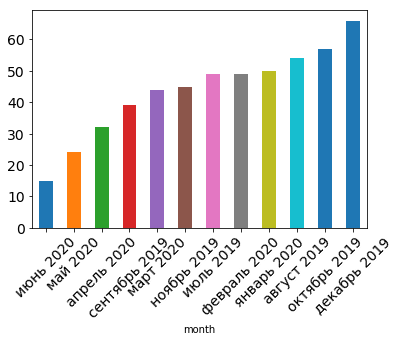

In [210]:
a.plot(kind='bar', rot=45, fontsize=14, stacked=False)

In [215]:
b = data_query[['DSG', 'VVD', 'VNM', 'auto']]
b.sum()

DSG     102
VVD     408
VNM     223
auto     33
dtype: int64

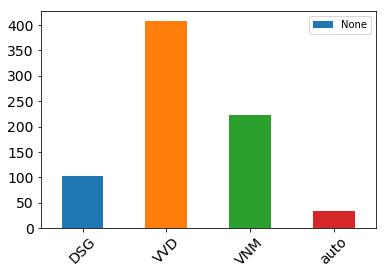

In [235]:
b.sum().plot(kind='bar', rot=45, fontsize=14, stacked=False, legend = True)

In [224]:
c = data_query.groupby(['how_know'],sort=True).size().sort_values()
c

how_know
European Youth Portal                                                                                                1
Рассказала подруга                                                                                                   1
Рассказали родственники                                                                                              1
Сказали                                                                                                              1
Сказали люди                                                                                                         1
Социальные сети (видел рекламу о интегративной вечеринке)                                                            1
Татьяна Костева, Денис Никитенко                                                                                     1
У вас работает моя знакомая                                                                                          1
Участвовала в барахолках               

In [249]:
d = data_query.groupby(['old'],sort=True).size().sort_values()
d

old
68.0     1
44.0     1
49.0     1
55.0     1
46.0     1
58.0     1
59.0     1
57.0     1
53.0     2
62.0     2
47.0     3
37.0     3
45.0     5
40.0     5
38.0     5
41.0     6
39.0     6
35.0     7
43.0     8
42.0     9
34.0    12
23.0    12
33.0    15
29.0    15
27.0    15
32.0    16
36.0    16
28.0    17
26.0    19
31.0    19
30.0    20
17.0    22
21.0    26
25.0    27
24.0    31
19.0    31
18.0    31
20.0    33
16.0    35
22.0    43
dtype: int64

In [252]:
data_query.sort_values('old',ascending=False).head()

,date,month,name,uchastie_dsg,old,job,how_know,DSG,VVD,VNM,auto,help,comment,result
602,24.12.2019,декабрь 2019,Валентина Волкова,0,68.0,Пенсионер,"Информационная встреча ,,Как стать волонтером,...",0,1,0,0,NaN,связалась с Ольгой. доки все готовы!,Павловск сб
810,26.05.2020,май 2020,Мария Пагольская,0,62.0,Каритас,Волонтер выходного дня,1,0,0,0,Фотосъёмкой,не дозвонилась. связались. возможно с июля.был...,NaN
646,21.01.2020,январь 2020,Яковлев Александр,0,62.0,не работаю,Поиск в интернете,0,1,0,0,"Фотосъёмкой, контактная помощь детям",приглашён на встречу 28.01,Павловск сб
748,25.03.2020,март 2020,Елена Мациевич,0,59.0,ПЕНСИОНЕРКА,Поиск в интернете,0,1,0,0,Психотерапия,"написала письмо 25,03",NaN
433,23.10.2019,октябрь 2019,Цветкова Марина Юрьевна,0,58.0,Пенсионерка,Поиск в интернете,1,0,0,0,"Няня,психолог-консультант,прогулки,чтение книг...",приглашена на встречу 29.10,Кризисная


In [240]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

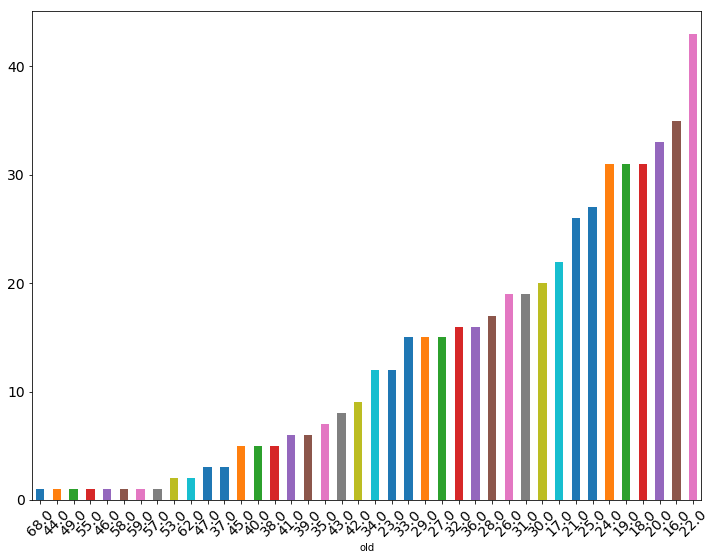

In [241]:
d.plot(kind='bar', rot=45, fontsize=14, stacked=False)

In [245]:
data_query['old'].describe()

count    524.000000
mean      26.522901
std        8.727741
min       16.000000
25%       20.000000
50%       24.000000
75%       31.000000
max       68.000000
Name: old, dtype: float64

In [247]:
data_query['old'].median()

24.0

In [254]:
e = data_query.groupby(['job'],sort=True).size().sort_values()
e

job
ООО"ЭМСИПИ-Медикейр"                                                                1
СПбГИК                                                                              1
СПбГАСу                                                                             1
СПбГАСУ                                                                             1
СПбГАВМ                                                                             1
СПб ГБУЗ "Городская поликлиника №111"                                               1
СПб ГБУ "ПРЦ"                                                                       1
СПб БОО "Перспективы"                                                               1
СПХФУ                                                                               1
СПБУТУИЭ                                                                            1
СПБПУ                                                                               1
СПбГИК (актриса драматического театра и кино)     